In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime as dt

In [71]:
historical_data = pd.read_csv('historical_data.csv')

In [72]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [73]:
historical_data.dropna(inplace=True)
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175777 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_id                                      175777 non-null  int64  
 4   store_primary_category                        175777 non-null  object 
 5   order_protocol                                175777 non-null  float64
 6   total_items                                   175777 non-null  int64  
 7   subtotal                                      175777 non-null  int64  
 8   num_distinct_items                            175777 non-null  int64  
 9   min_item_price                                17

In [74]:
historical_data['market_id'].value_counts()

2.0    53469
4.0    46222
1.0    37115
3.0    21075
5.0    17258
6.0      638
Name: market_id, dtype: int64

In [75]:
historical_data.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0
16,1.0,2015-02-06 00:42:42,2015-02-06 02:10:29,2841,italian,1.0,3,4475,3,925,1825,4.0,1.0,1.0,446,542.0
17,1.0,2015-02-08 02:04:17,2015-02-08 03:27:13,2841,italian,1.0,3,4375,3,1325,1625,6.0,4.0,3.0,446,789.0
18,1.0,2015-01-31 04:35:54,2015-01-31 05:47:30,2841,italian,1.0,2,3150,2,1425,1725,4.0,9.0,12.0,446,548.0
19,1.0,2015-01-31 02:21:23,2015-01-31 03:11:42,4139,mexican,1.0,2,950,2,150,700,24.0,24.0,26.0,446,212.0
20,1.0,2015-01-31 23:45:12,2015-02-01 00:14:05,4139,mexican,1.0,5,1285,3,150,400,12.0,13.0,11.0,446,424.0


In [76]:
historical_data["created_at"] = pd.to_datetime(historical_data['created_at'])
historical_data["actual_delivery_time"] = pd.to_datetime(historical_data['actual_delivery_time'])
historical_data["actual_total_delivery_duration"] = (historical_data["actual_delivery_time"] - historical_data["created_at"]).dt.total_seconds()

(array([1.1464e+04, 2.5722e+04, 3.2896e+04, 2.3693e+04, 1.3248e+04,
        6.0780e+03, 1.2230e+03, 9.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.8000e+01,
        5.0200e+02, 1.9360e+03, 3.0580e+03, 4.5140e+03, 1.2083e+04,
        1.3883e+04, 1.0219e+04, 7.8750e+03, 7.3340e+03]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

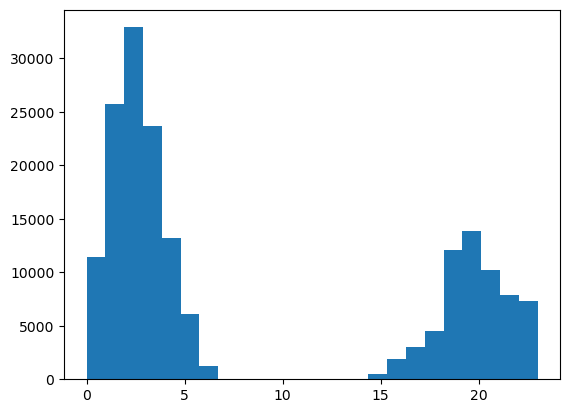

In [77]:
historical_data["hour_of_order"] = historical_data['created_at'].dt.hour
plt.hist(historical_data["hour_of_order"], bins = 24)

(array([0.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 1.300e+01,
        2.500e+01, 6.800e+01, 1.730e+02, 3.610e+02, 6.230e+02, 1.012e+03,
        1.594e+03, 2.236e+03, 2.913e+03, 3.892e+03, 4.601e+03, 5.458e+03,
        6.096e+03, 6.939e+03, 7.492e+03, 7.726e+03, 7.976e+03, 7.969e+03,
        8.137e+03, 7.804e+03, 7.576e+03, 7.311e+03, 6.860e+03, 6.381e+03,
        6.097e+03, 5.549e+03, 5.086e+03, 4.585e+03, 4.332e+03, 3.908e+03,
        3.584e+03, 3.216e+03, 2.948e+03, 2.572e+03, 2.343e+03, 2.103e+03,
        1.946e+03, 1.708e+03, 1.493e+03, 1.404e+03, 1.158e+03, 1.056e+03,
        9.550e+02, 8.510e+02, 8.170e+02, 6.990e+02, 5.820e+02, 5.410e+02,
        5.210e+02, 4.220e+02, 4.160e+02, 3.500e+02, 3.120e+02, 2.540e+02,
        2.150e+02, 1.980e+02, 2.190e+02, 1.990e+02, 1.680e+02, 1.460e+02,
        1.410e+02, 1.270e+02, 1.020e+02, 8.000e+01, 8.600e+01, 6.800e+01,
        6.300e+01, 6.500e+01, 6.000e+01, 5.600e+01, 4.700e+01, 5.000e+01,
        4.100e+01, 4.500e+01, 4.300e+0

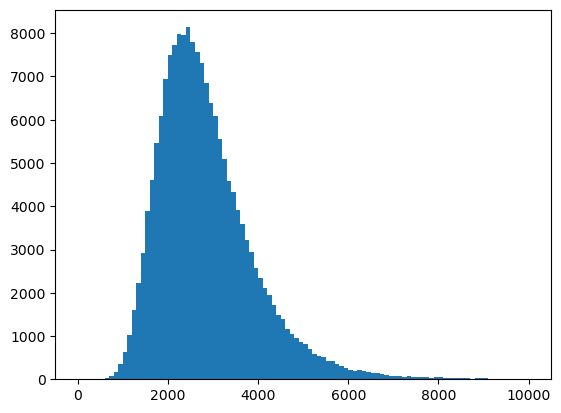

In [78]:
plt.hist(historical_data["actual_total_delivery_duration"], bins=100, range=(0,10000))

In [79]:
historical_data["actual_total_delivery_duration"].sort_values()

63294        101.0
862          223.0
30562        297.0
42507        321.0
117928       325.0
            ...   
86952      48178.0
190860     54447.0
83055      57032.0
27189     332482.0
185550    373879.0
Name: actual_total_delivery_duration, Length: 175777, dtype: float64

In [80]:
historical_data.drop(historical_data[historical_data["actual_total_delivery_duration"]>8000].index, inplace=True)

In [81]:
historical_data['store_id'].value_counts()

6865    922
1311    848
314     804
1686    754
3937    710
       ... 
832       1
932       1
1258      1
6047      1
1845      1
Name: store_id, Length: 5640, dtype: int64

In [82]:
historical_data['store_id'].nunique()

5640

In [83]:
primary_cat = historical_data['store_primary_category'].value_counts()

In [84]:
historical_data['store_primary_category'].nunique()

73

In [85]:
convert = primary_cat[40:]
historical_data['store_primary_category'] = historical_data['store_primary_category'].apply(lambda x: 'other' if x in convert else x)

In [86]:
historical_data['store_primary_category'].value_counts()

american             18135
pizza                15694
mexican              15555
burger                9881
sandwich              8971
chinese               8526
japanese              8187
dessert               8051
other                 6876
italian               6719
fast                  6476
indian                6358
thai                  6203
vietnamese            5559
mediterranean         5111
breakfast             4831
salad                 3462
greek                 2949
barbecue              2670
seafood               2583
asian                 2214
sushi                 2094
cafe                  2018
alcohol               1739
korean                1690
catering              1544
smoothie              1520
middle-eastern        1453
hawaiian              1447
steak                 1029
dim-sum                991
vegetarian             753
burmese                638
pasta                  624
persian                573
french                 556
latin-american         489
b

(array([84385., 57619., 20292.,  7188.,  2780.,  1312.,   642.,   370.,
          215.,   115.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

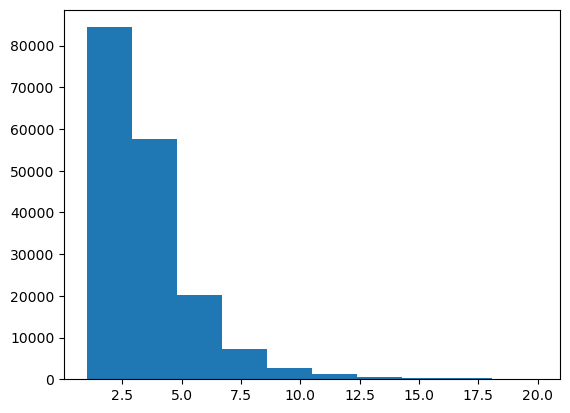

In [87]:
plt.hist(historical_data['total_items'], bins = 10, range = (1,20))

(array([ 2224., 20739., 29939., 27196., 22495., 18396., 13816., 10430.,
         7537.,  5620.,  3971.,  2971.,  2176.,  1733.,  1238.,  1013.,
          767.,   621.,   480.,   375.]),
 array([  100.,   595.,  1090.,  1585.,  2080.,  2575.,  3070.,  3565.,
         4060.,  4555.,  5050.,  5545.,  6040.,  6535.,  7030.,  7525.,
         8020.,  8515.,  9010.,  9505., 10000.]),
 <BarContainer object of 20 artists>)

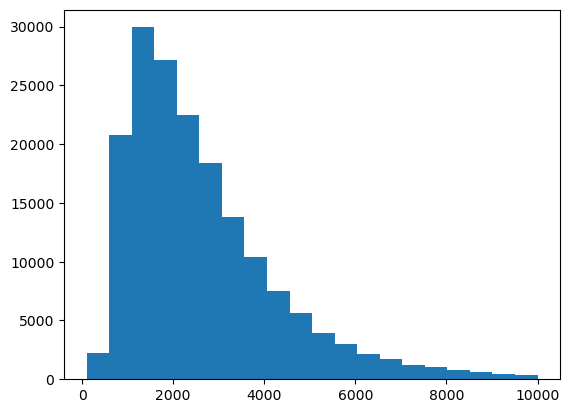

In [88]:
plt.hist(historical_data['subtotal'], bins = 20, range = (100,10000))

(array([9.6426e+04, 5.8032e+04, 1.5552e+04, 3.8450e+03, 9.9400e+02,
        2.8000e+02, 7.7000e+01, 1.8000e+01, 5.0000e+00, 2.0000e+00]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

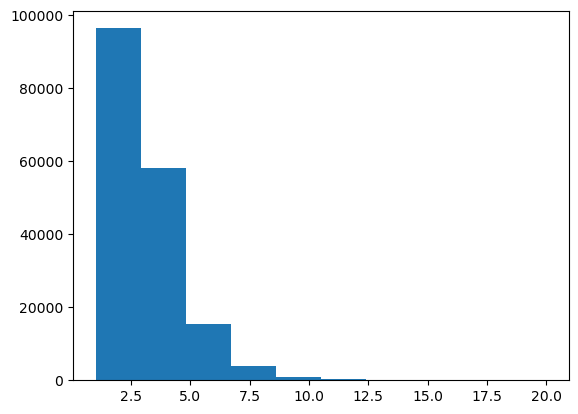

In [89]:
plt.hist(historical_data['num_distinct_items'], bins = 10, range = (1,20))

In [90]:
historical_data['total_available_dashers'] = historical_data['total_onshift_dashers'] - historical_data['total_busy_dashers']

In [91]:
len(historical_data[historical_data['total_available_dashers']<0])

39125

In [92]:
historical_data = historical_data.drop(columns = ['created_at', 'actual_delivery_time', 'store_id', 'total_onshift_dashers', 'total_busy_dashers'])

In [93]:
market_id_dummies = pd.get_dummies(historical_data.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')

In [94]:
category_dummies = pd.get_dummies(historical_data.store_primary_category)
category_dummies = category_dummies.add_prefix('category_')

In [95]:
order_protocol_dummies = pd.get_dummies(historical_data.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')

In [96]:
hour_dummies = pd.get_dummies(historical_data.hour_of_order)
hour_dummies = hour_dummies.add_prefix('hour_')

In [97]:
final_df = pd.concat([historical_data, market_id_dummies, category_dummies, order_protocol_dummies, hour_dummies], axis=1)

In [98]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175231 entries, 0 to 197427
Data columns (total 85 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175231 non-null  float64
 1   store_primary_category                        175231 non-null  object 
 2   order_protocol                                175231 non-null  float64
 3   total_items                                   175231 non-null  int64  
 4   subtotal                                      175231 non-null  int64  
 5   num_distinct_items                            175231 non-null  int64  
 6   min_item_price                                175231 non-null  int64  
 7   max_item_price                                175231 non-null  int64  
 8   total_outstanding_orders                      175231 non-null  float64
 9   estimated_order_place_duration                17

In [99]:
final_df = final_df.drop(columns = ['store_primary_category', 'order_protocol', 'market_id', 'hour_of_order'])

In [100]:
corr = final_df.corr()

In [101]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

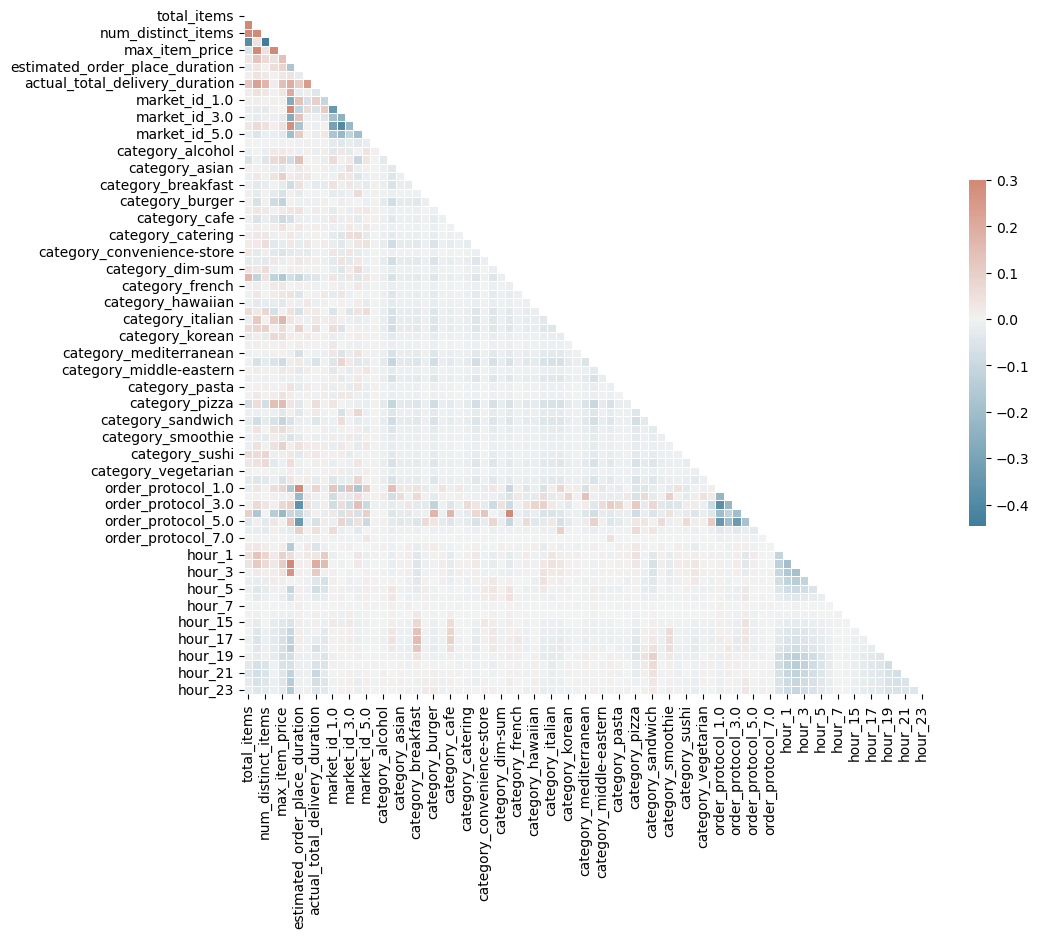

In [102]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [103]:
corr.abs().unstack().sort_values(ascending = False).drop_duplicates().head(20)

total_items                     total_items                       1.000000
estimated_order_place_duration  order_protocol_1.0                0.900299
total_items                     num_distinct_items                0.758043
subtotal                        num_distinct_items                0.680874
                                total_items                       0.554702
min_item_price                  max_item_price                    0.540671
subtotal                        max_item_price                    0.509695
order_protocol_4.0              category_fast                     0.500683
min_item_price                  num_distinct_items                0.446896
market_id_2.0                   market_id_4.0                     0.395441
total_items                     min_item_price                    0.389630
order_protocol_1.0              order_protocol_3.0                0.373235
estimated_order_place_duration  order_protocol_3.0                0.363468
order_protocol_1.0       

In [104]:
final_df['ratio_of_items'] = final_df['num_distinct_items']/final_df['total_items']

In [105]:
final_df['average_price'] = (final_df['min_item_price'] + final_df['max_item_price'])/2

In [106]:
final_df["avg_price_per_item"] = final_df["subtotal"] / final_df["total_items"]

In [107]:
corr = final_df.corr()
corr.abs().unstack().sort_values(ascending = False).drop_duplicates().head(20)

total_items                     total_items                       1.000000
avg_price_per_item              average_price                     0.926523
order_protocol_1.0              estimated_order_place_duration    0.900299
max_item_price                  average_price                     0.887450
average_price                   min_item_price                    0.867546
avg_price_per_item              min_item_price                    0.860059
                                max_item_price                    0.770109
num_distinct_items              total_items                       0.758043
subtotal                        num_distinct_items                0.680874
total_items                     subtotal                          0.554702
max_item_price                  min_item_price                    0.540671
subtotal                        max_item_price                    0.509695
order_protocol_4.0              category_fast                     0.500683
num_distinct_items       

In [108]:
final_df.drop(columns=['min_item_price', 'max_item_price', 'avg_price_per_item', 'num_distinct_items'], inplace=True)

In [109]:
corr = final_df.corr()
corr.abs().unstack().sort_values(ascending = False).drop_duplicates().head(20)

total_items                     total_items                       1.000000
order_protocol_1.0              estimated_order_place_duration    0.900299
total_items                     subtotal                          0.554702
category_fast                   order_protocol_4.0                0.500683
ratio_of_items                  total_items                       0.444523
market_id_2.0                   market_id_4.0                     0.395441
order_protocol_3.0              order_protocol_1.0                0.373235
                                estimated_order_place_duration    0.363468
order_protocol_5.0              order_protocol_1.0                0.342373
market_id_1.0                   market_id_2.0                     0.341755
order_protocol_3.0              order_protocol_5.0                0.336335
hour_2                          total_outstanding_orders          0.336319
estimated_order_place_duration  order_protocol_5.0                0.332745
subtotal                 

In [110]:
final_df = final_df.astype("float32")

In [111]:
features = final_df.drop(columns=["actual_total_delivery_duration"]).columns.to_list()

In [112]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [113]:
X = final_df[features]
y = final_df["actual_total_delivery_duration"]

In [114]:
scaler = MinMaxScaler()
scaler_fit = scaler.fit(final_df)
scaled = scaler_fit.transform(final_df)
scaled_df = pd.DataFrame(scaled, columns = final_df.columns)

In [115]:
scaled_df

,total_items,subtotal,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,total_available_dashers,market_id_1.0,market_id_2.0,market_id_3.0,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,ratio_of_items,average_price
0,0.007317,0.128396,0.092784,0.164273,0.495112,0.465864,0.553333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.061088
1,0.000000,0.070896,0.027491,0.164273,0.396780,0.496897,0.420000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.095238
2,0.007317,0.178022,0.082474,0.164273,0.166187,0.188094,0.440000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746921,0.082449
3,0.000000,0.056903,0.048110,0.164273,0.457159,0.275111,0.420000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.103741
4,0.002439,0.135075,0.044674,0.164273,0.117884,0.365674,0.426667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.123129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175226,0.004878,0.051828,0.099656,0.092449,0.190339,0.482077,0.426667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.033810
175227,0.012195,0.112313,0.068729,0.092449,0.526164,0.415706,0.433333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.662562,0.041837
175228,0.009756,0.068507,0.158076,0.092449,0.457159,0.368208,0.413333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.595074,0.023776
175229,0.000000,0.043843,0.061856,0.164273,0.220817,0.482077,0.426667,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.036395


In [116]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df[features], scaled_df['actual_total_delivery_duration'], test_size=0.2, random_state=42)

In [117]:
from sklearn.ensemble import RandomForestRegressor

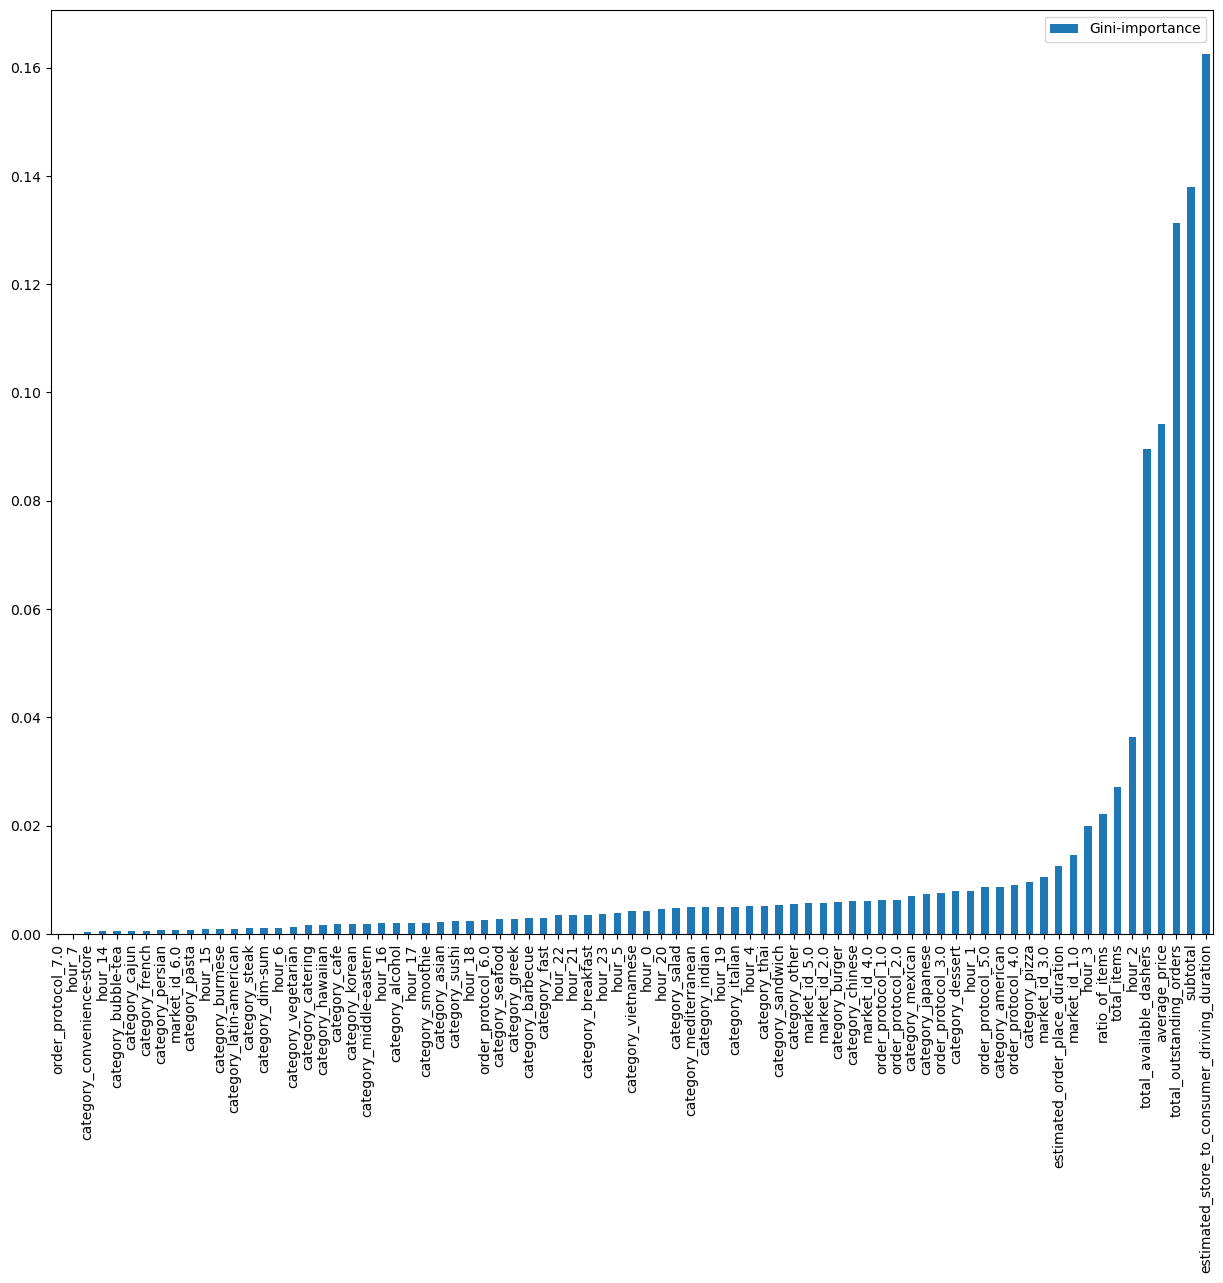

In [118]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {} 
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()                                              

In [119]:
from sklearn.decomposition import PCA

In [120]:
pca = PCA().fit(X_train)

/tmp/ipykernel_60576/3762665185.py:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,79,1)


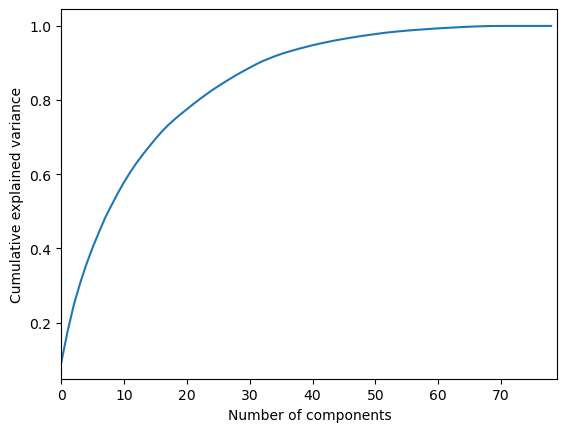

In [121]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,79,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [122]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [124]:
models = {"Ridge" : Ridge(),
         "Decision Tree" : DecisionTreeRegressor(),
         "Random Forest" : RandomForestRegressor(),
         "XGBoost" : XGBRegressor(),
         "LightGBM" : LGBMRegressor(),
         "K Nearest Neighbors" : KNeighborsRegressor(),
         "Multi Layer Perceptron" : MLPRegressor()}

In [125]:
def train_model (X_train, X_test, y_train, y_test, model, model_name, scaler):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_predict1 = scaler.inverse_transform(y_predict.reshape(-1, 1))
    y_test1 = scaler.inverse_transform(y_test.values.reshape(-1, 1))
    test_error = mean_squared_error(y_test1, y_predict1, squared=False)
    print("Test error = "'{}'.format(test_error)+" in " + model_name)

In [126]:
scaler = MinMaxScaler()
y_scaler = scaler.fit(final_df["actual_total_delivery_duration"].values.reshape(-1,1))
for model in models:
    train_model(X_train, X_test, y_train, y_test, models[model], model, y_scaler)

Test error = 907.1592407226562 in Ridge
Test error = 1257.5938540234056 in Decision Tree
Test error = 885.952751526621 in Random Forest
Test error = 867.0507202148438 in XGBoost
Test error = 866.5979004993342 in LightGBM


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f30903e6f80>
Traceback (most recent call last):
  File "/home/gesskay/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gesskay/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gesskay/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gesskay/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Test error = 968.131591796875 in K Nearest Neighbors
Test error = 885.8116455078125 in Multi Layer Perceptron


In [143]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError
import tensorflow as tf

In [144]:
model = tf.keras.Sequential()
model.add(Dense(40, input_dim = (len(features)), activation = 'relu'))

In [145]:
model.add(Dense(10, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))

In [146]:
model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

In [132]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=51200)])
  except RuntimeError as e:
    print(e)


Virtual devices cannot be modified after being initialized


In [140]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: Physical devices cannot be modified after being initialized

In [141]:
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print(os.getenv('TF_GPU_ALLOCATOR'))

cuda_malloc_async


In [147]:
history = model.fit(X_train, y_train, epochs = 50, verbose = 2)

Epoch 1/50


2023-07-02 12:25:15.193299: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:219] failed to create cublas handle: the library was not initialized
2023-07-02 12:25:15.193338: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:222] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2023-07-02 12:25:15.194640: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at matmul_op_impl.h:621 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support
2023-07-02 12:25:15.194886: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:GPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: Attempting to perform BLAS oper

InternalError: Graph execution error:

Detected at node 'sequential_3/dense_9/MatMul' defined at (most recent call last):
    File "/home/gesskay/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/gesskay/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/gesskay/anaconda3/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/gesskay/anaconda3/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/home/gesskay/anaconda3/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_60576/3849443103.py", line 1, in <module>
      history = model.fit(X_train, y_train, epochs = 50, verbose = 2)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/gesskay/anaconda3/lib/python3.10/site-packages/keras/layers/core/dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential_3/dense_9/MatMul'
Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node sequential_3/dense_9/MatMul}}]] [Op:__inference_train_function_2232]

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_scaler = scaler.fit(final_df["actual_total_delivery_duration"].values.reshape(-1,1))
y_predict1 = y_scaler.inverse_transform(y_predict.reshape(-1, 1))
y_test1 = y_scaler.inverse_transform(y_test.values.reshape(-1, 1))

In [ ]:
test_error = mean_squared_error(y_test1, y_predict1, squared=False)

In [ ]:
test_error